# **Exploratory Data Analysis On Cereal Data**

## **Library Importation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
data = pd.read_csv('cereal.csv')

In [3]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## **Basic Exploration of Data**

In [4]:
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [5]:
print(f'The Total Number of Rows Present in the Data are {data.shape[0]}')
print(f'The Total Number of Columns Present in the Data are {data.shape[1]}')

The Total Number of Rows Present in the Data are 77
The Total Number of Columns Present in the Data are 16


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [8]:
data.select_dtypes(object).describe().T

,count,unique,top,freq
name,77,77,100% Bran,1
mfr,77,7,K,23
type,77,2,C,74


Inferences :

- We have 77 Rows in the Data.

- We have 16 COlumns in the Data.
    - Among Them 2 are Categorical and 1 is a unique Identifier
    - 13 Columns are Numerical in nature
    - Out of those 13 Columns few have Categorical Behavior
    

## **Correlation Analysis**

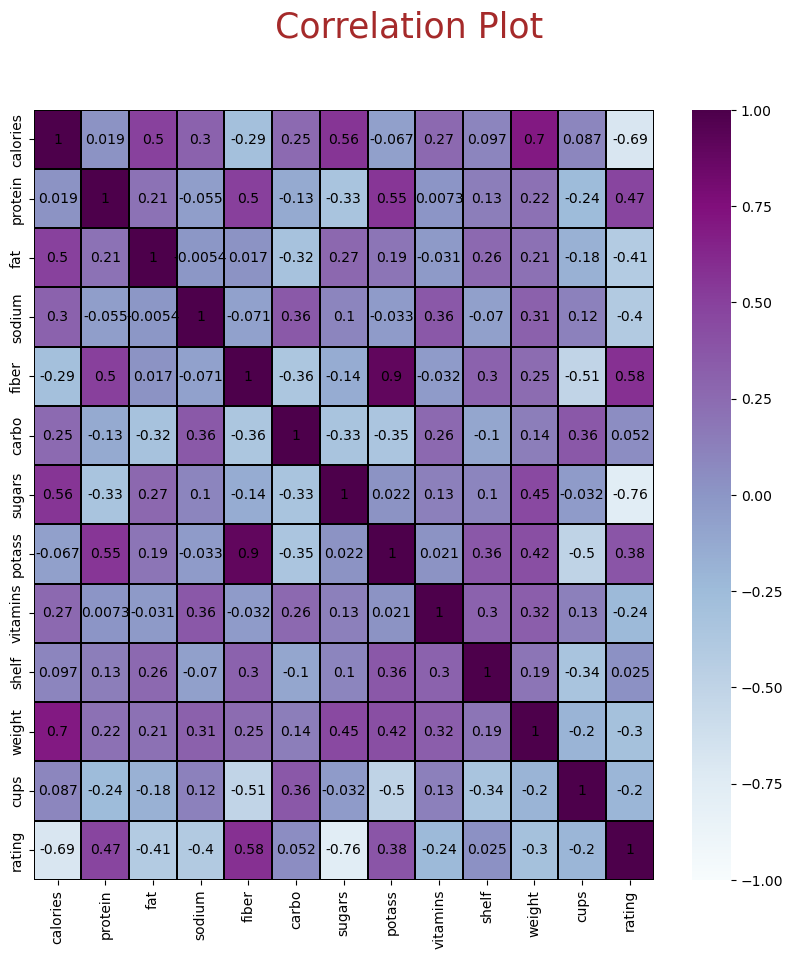

In [9]:
plt.figure(figsize=(10,10))
plt.suptitle('Correlation Plot', size = 25, color = 'brown')
sns.heatmap(data = data.corr(numeric_only=True), vmax=1, vmin = -1, annot= True, linecolor='black',
             linewidths=0.15, cmap='BuPu',annot_kws={"color": "black"} )

plt.show()

Infernces :

- Potassiumm and Fiber Column have Strong Positive COrrelation means if one of them increase another will increase too and same nature shown by -
    - Potassium and Rating Columns
    - Weight And Rating Columns
    - Fiber And Rating Column 

- While Cereals Having High Sugars and High Calories Have Low Rating.

- Sugars and Rating Have Lowest Correlation of -0.76

- These Correlation is given By Karl Pearson Method Of Correlation.

Name Columns Have All Unique Values so its better to make it Index

In [10]:
data.set_index('name', inplace=True)

## **Column Exploration in the data**

In [11]:
data.tail(3)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [12]:
data.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [13]:
data['protein'].unique()

array([4, 3, 2, 1, 6, 5], dtype=int64)

In [14]:
data['fat'].unique()

array([1, 5, 0, 2, 3], dtype=int64)

In [15]:
data['shelf'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
data['vitamins'].unique()

array([ 25,   0, 100], dtype=int64)

In [17]:
data['calories'].unique()

array([ 70, 120,  50, 110, 130,  90, 100, 140, 150, 160,  80], dtype=int64)

for Further Analysis Its Better to Categorize the data of Calories COlumn

In [18]:
x = [0,60,120,180]
y = ['Low Caloric', 'Mild Caloric','High Caloric']

data['calories'] = pd.cut(data['calories'], bins = x, labels = y)

In [19]:
data['calories']

name
100% Bran                    Mild Caloric
100% Natural Bran            Mild Caloric
All-Bran                     Mild Caloric
All-Bran with Extra Fiber     Low Caloric
Almond Delight               Mild Caloric
                                 ...     
Triples                      Mild Caloric
Trix                         Mild Caloric
Wheat Chex                   Mild Caloric
Wheaties                     Mild Caloric
Wheaties Honey Gold          Mild Caloric
Name: calories, Length: 77, dtype: category
Categories (3, object): ['Low Caloric' < 'Mild Caloric' < 'High Caloric']

In [20]:
data.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

## **Categorization of Columns Into Numerical Columns And Categorical Columns**

In [21]:
num_cols = [ 'sodium', 'fiber', 'carbo',
       'sugars', 'potass',  'weight', 'cups', 'rating']

cat_cols = ['mfr', 'type','calories', 'protein', 'fat', 'vitamins', 'shelf']

## **Univariate Analysis of Numerical Columns Using Kde Plot**

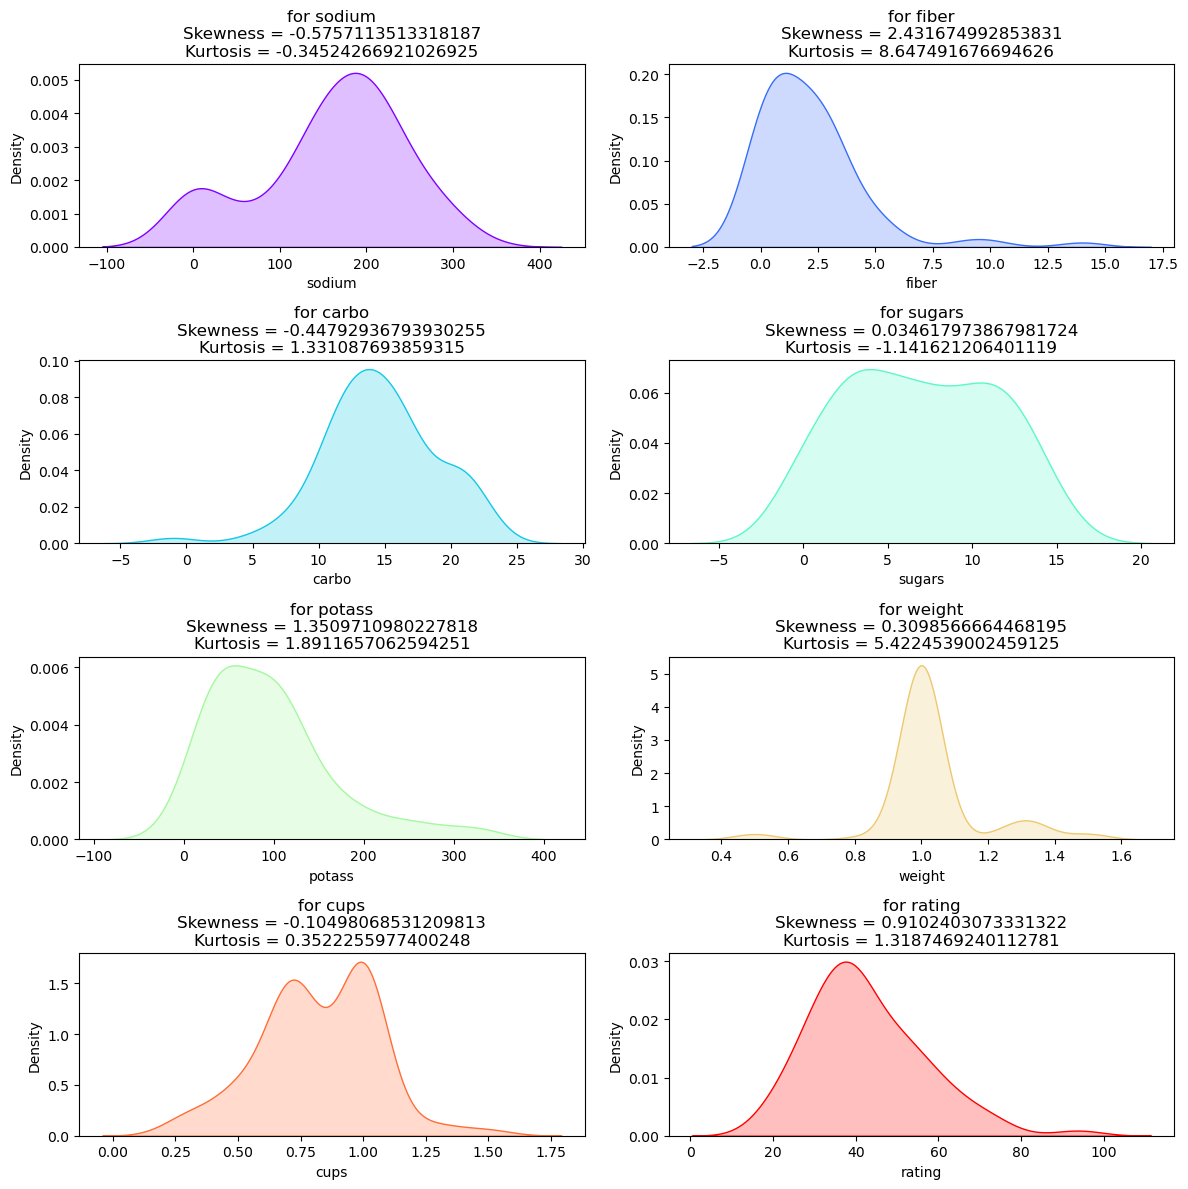

In [22]:
q = 1
plt.figure(figsize=(12,12))
colors = plt.cm.rainbow(np.linspace(0,1, len(num_cols)))
for i,color in zip(num_cols,colors):
    plt.subplot(4,2,q)
    sns.kdeplot(data=data, x = i, fill=True, color = color)
    plt.title(f'''for {i}
Skewness = {data[i].skew()}
Kurtosis = {data[i].kurt()}''')
    q+=1
plt.tight_layout()
plt.show()

Inferences 
* Sodium: The data shows two main groups of values for sodium, not just one average. There are slightly more values on the lower end.
* Fiber: Most items have a very low amount of fiber. It's rare to find items with high fiber content.
* Carbohydrates (Carbo):Most items have a lower amount of carbohydrates, with fewer items having higher amounts.
* Sugars: Most items contain very little sugar. It's uncommon to find items with high sugar content, and the range of sugar values isn't very wide.
* Potassium (Potass): Similar to fiber and sugar, most items have a very low amount of potassium, with only a few having much higher amounts.
* Weight: The data suggests there's a very common weight range and another less common one. There's a slight tendency for items to be on the heavier side of the main range.
* Cups: Most items seem to be measured in smaller cup amounts, with fewer instances of larger cup amounts. The distribution is less concentrated around the average value.
* Rating: The ratings are somewhat spread out. The most frequent ratings are near the middle of the scale, but there are still a fair number of both high and low ratings. The distribution is more pointed in the middle than a standard bell curve, suggesting more values are clustered around the peak.

## **Univariate Analysis of Categorical Columns Using Countplot**

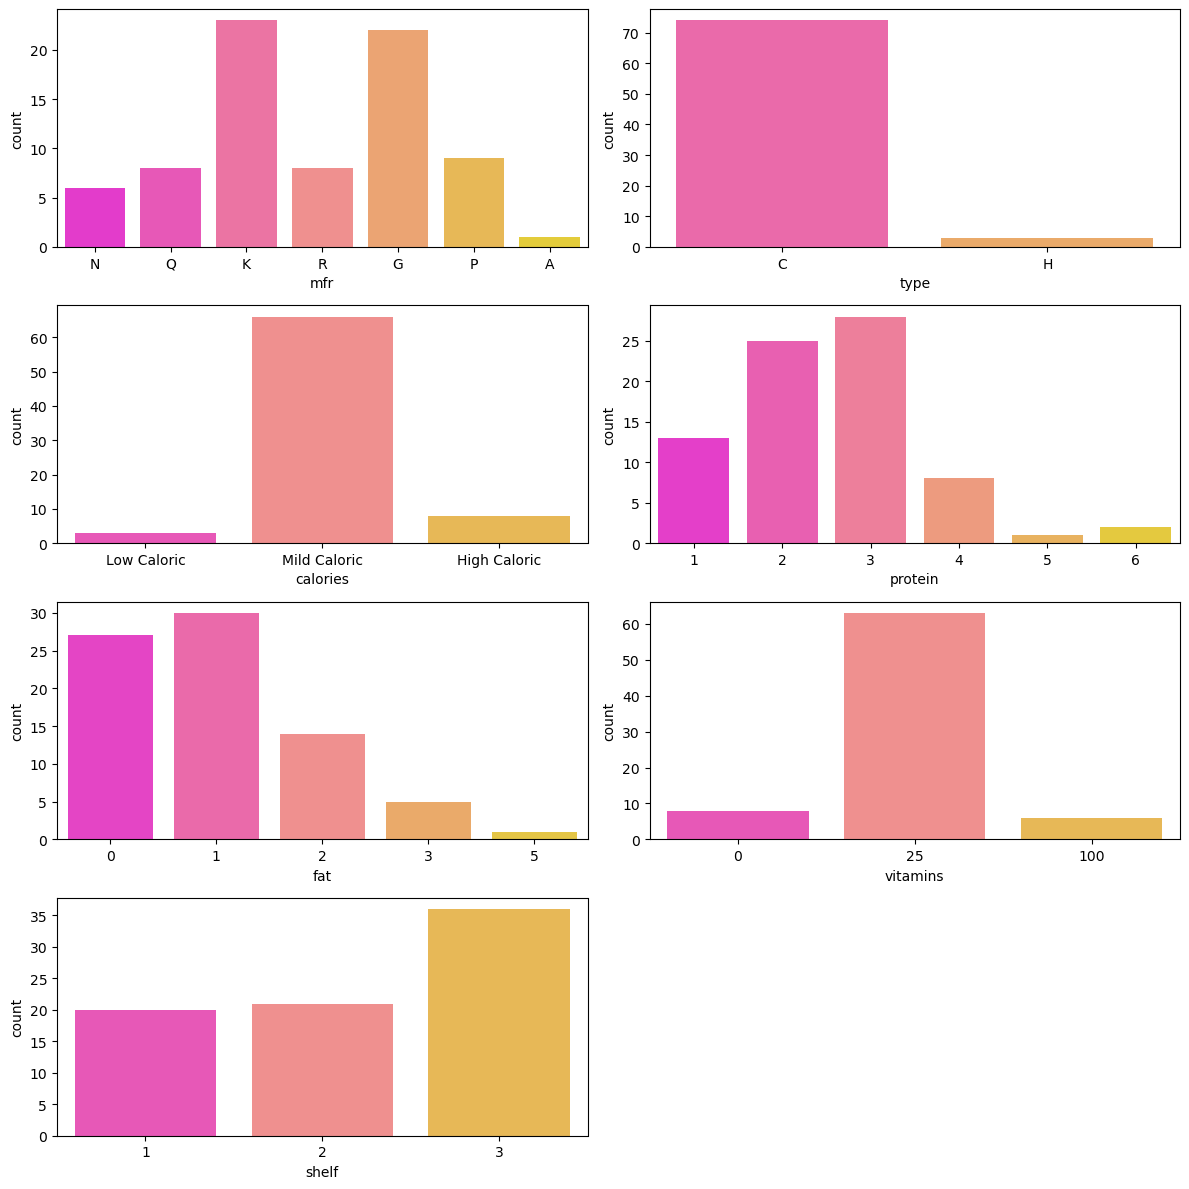

In [23]:
q = 1
plt.figure(figsize=(12,12))
for i in cat_cols:
    plt.subplot(4,2,q)
    sns.countplot(data= data, x = i, palette='spring')
    q+=1

plt.tight_layout()
plt.show()

Inferences:
* Certain manufacturers (labeled R and G) produce the most items in this dataset compared to other manufacturers.
* One particular type of item (labeled C) appears much more frequently than the other type (labeled H).
* Items categorized as having "Mild Caloric" levels are the most common, followed by those with "Low Caloric" levels. Items with "High Caloric" levels are the least common.
* Items in the dataset most often contain a moderate amount of protein (specifically levels 2 and 3). Items with very high protein (levels 5 and 6) are quite rare.
* The majority of items contain no fat (level 0). Items with small amounts of fat are less common, and those with higher fat levels are very infrequent.
* A specific level of vitamins (labeled 25) is present in most items. Items with no vitamins or a very high level (100) are less common.
* The items are most frequently located on shelf number 3. Shelves 1 and 2 contain a similar, but lower, number of items compared to shelf 3.

## **Bivariate Analysis Using Regplot**

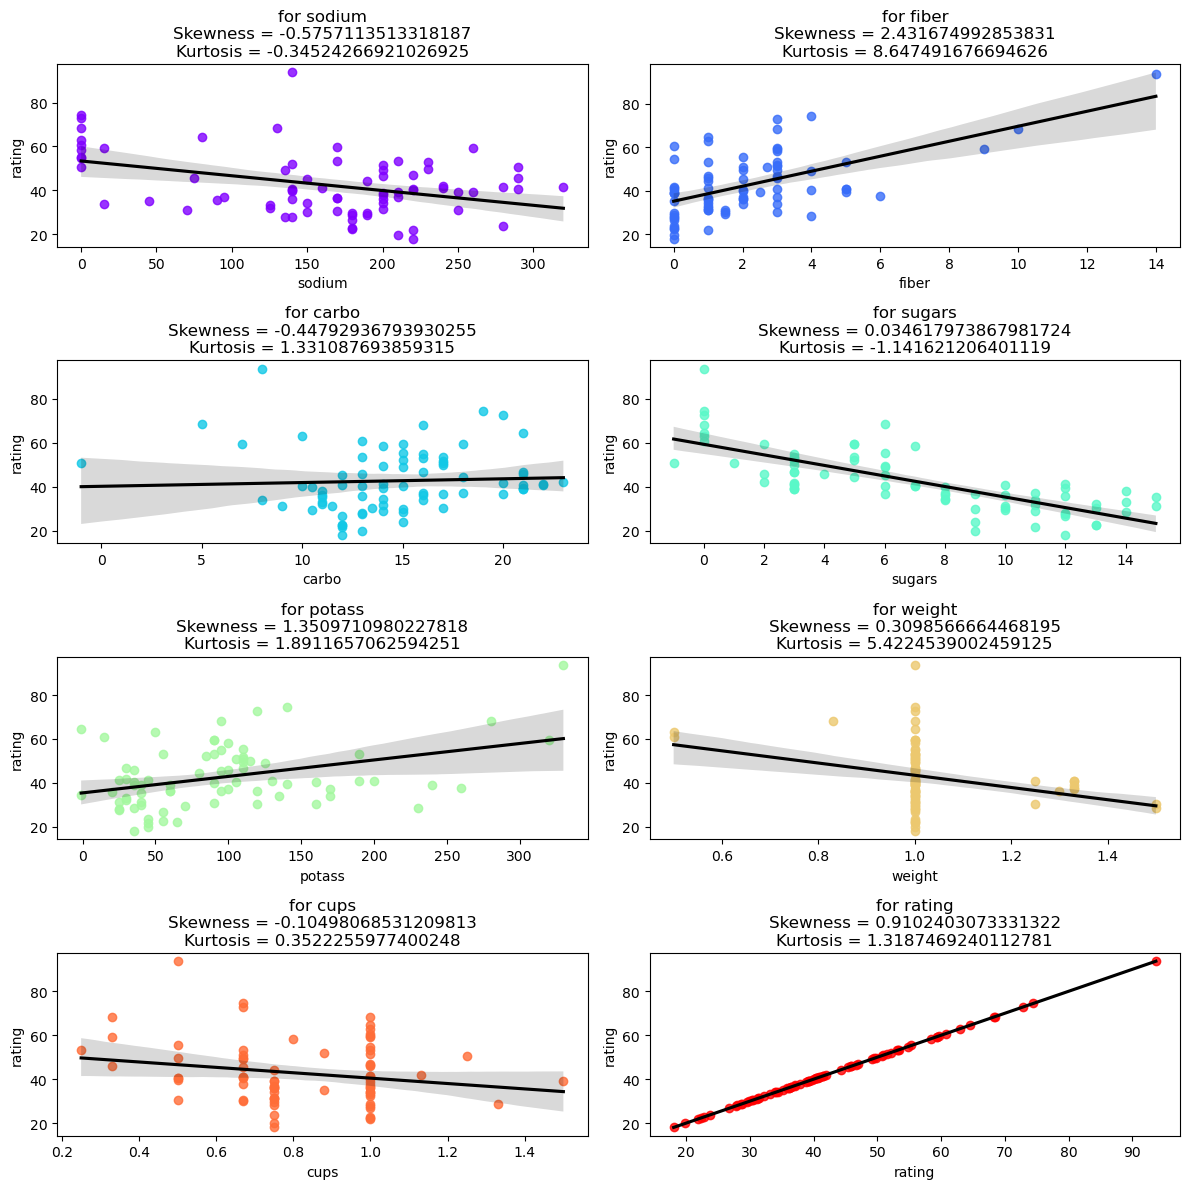

In [24]:
q = 1
plt.figure(figsize=(12,12))
colors = plt.cm.rainbow(np.linspace(0,1, len(num_cols)))
for i,color in zip(num_cols,colors):
    plt.subplot(4,2,q)
    sns.regplot(data=data, x = i, y = 'rating', color = color, line_kws={'color':'black'})
    plt.title(f'''for {i}
Skewness = {data[i].skew()}
Kurtosis = {data[i].kurt()}''')
    q+=1
plt.tight_layout()
plt.show()

Inferences :
* Items with more sodium tend to have slightly lower ratings, though the connection isn't very strong.
* There is a noticeable trend where items with more fiber tend to receive higher ratings.
* The amount of carbohydrates in an item doesn't show a clear or strong relationship with its rating.
* Items containing more sugar tend to have lower ratings, showing a noticeable connection.
* Items with higher potassium levels tend to have slightly higher ratings, but this isn't a strong or consistent pattern.
* Heavier items generally tend to have lower ratings, but this relationship isn't very strong.
* Items measured with a larger number of cups tend to have slightly lower ratings, though this isn't a strong trend.
* The last plot simply shows that a rating plotted against itself forms a perfect straight line, as expected.

## **BiVariate Analysis Using Violin Plot**

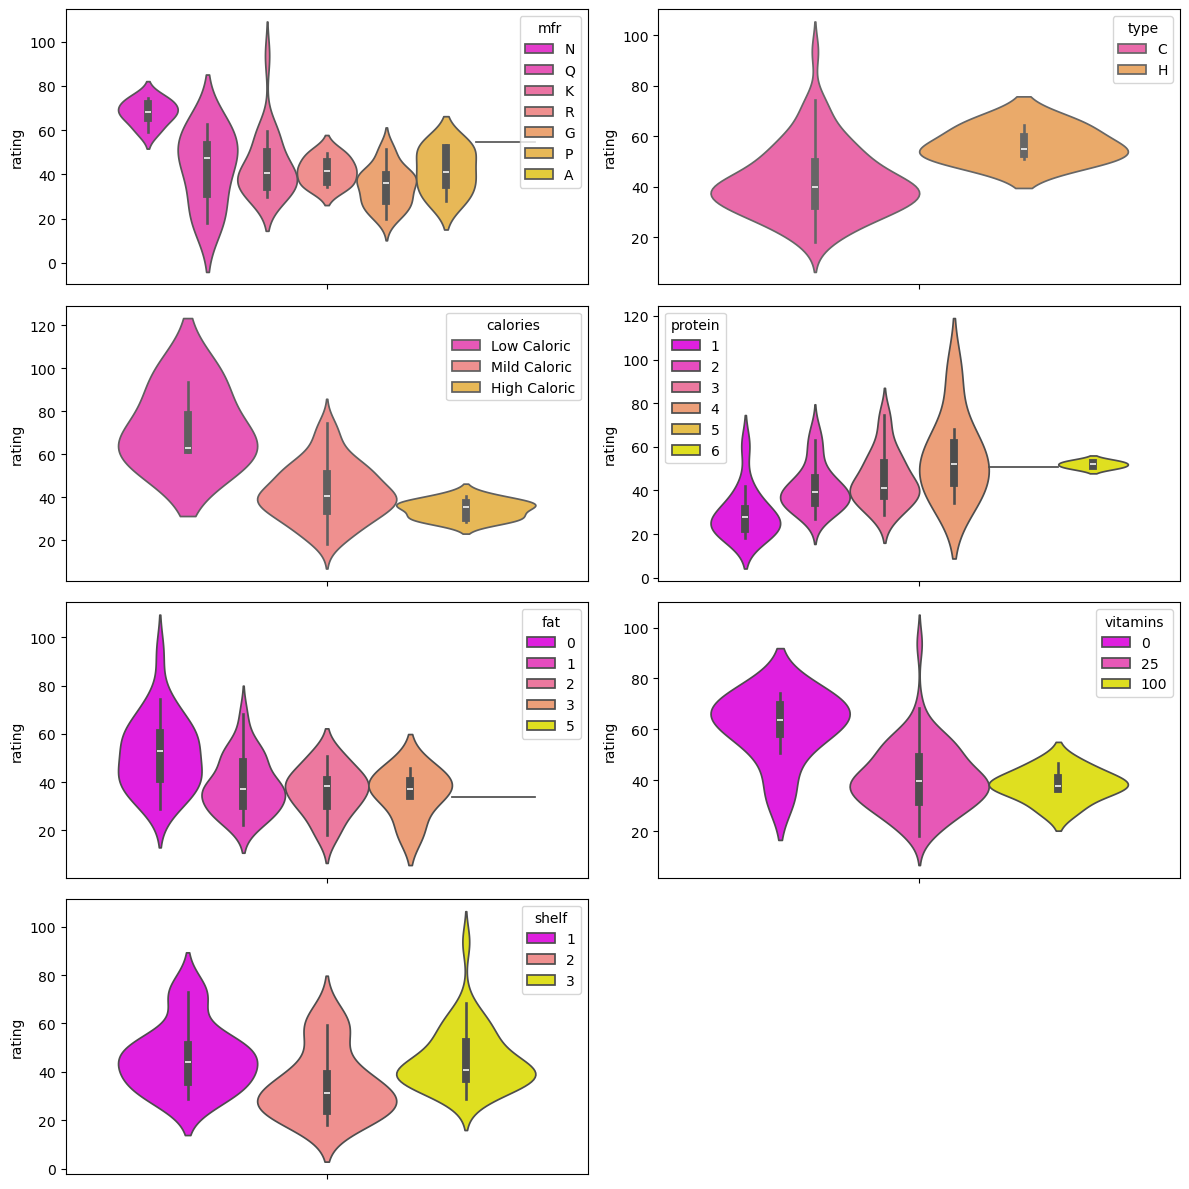

In [25]:
q = 1
plt.figure(figsize=(12,12))
for i in cat_cols:
    plt.subplot(4,2,q)
    sns.violinplot(data= data, y = 'rating', hue = i, palette='spring')
    q+=1

plt.tight_layout()
plt.show()

Inferences :
* Different manufacturers tend to have different typical rating ranges for their products. Some manufacturers (A, P, R) seem to produce items that are generally rated higher, while others (K) have items that are typically rated lower.
* One type of item (Type H) consistently receives higher ratings compared to the other type (Type C).
* Items with fewer calories tend to have higher ratings, while those with more calories typically receive lower ratings.
* As the protein content increases, the ratings of the items tend to get higher.
* Items with no fat are often rated higher than items with increasing amounts of fat, which tend to receive lower ratings.
* Items containing higher levels of vitamins (specifically level 100) generally have higher ratings compared to those with lower or no vitamins.
* The shelf where an item is located seems to relate to its rating. Items on shelf 1 tend to have higher ratings, while those on shelf 3 tend to have lower ratings.

## **Bivariate Analysis Using Point Plot**

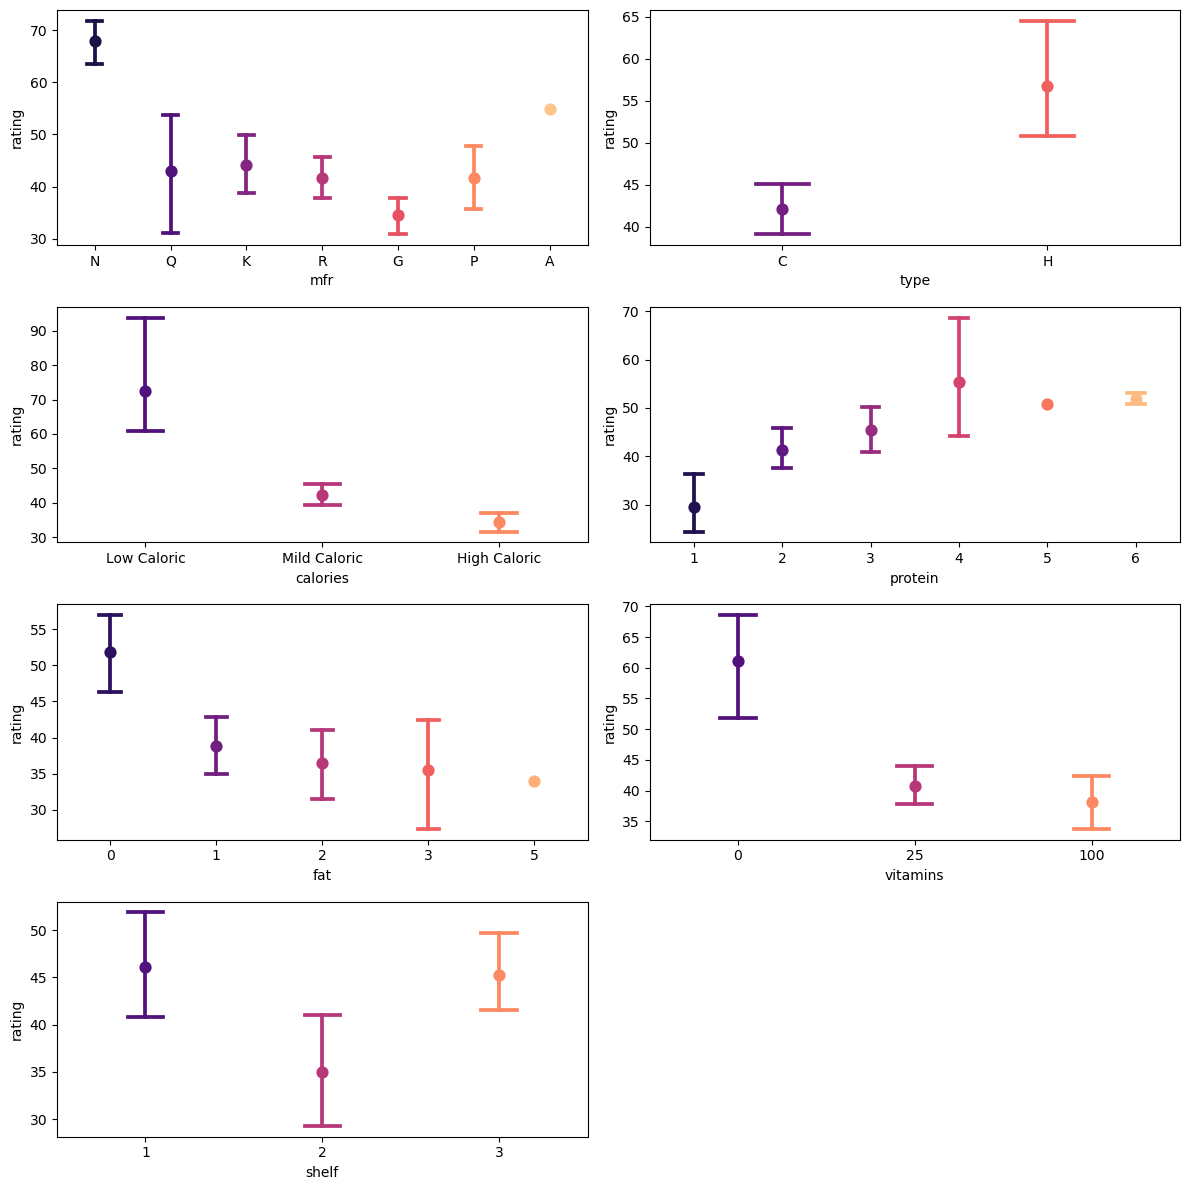

In [26]:
q = 1
plt.figure(figsize=(12,12))
for i in cat_cols:
    plt.subplot(4,2,q)
    sns.pointplot(data=data, x=i, y='rating', capsize=0.2, palette='magma')
    q+=1

plt.tight_layout()
plt.show()

## **Bivariate Analysis Using Barplot wuth mean estimator**

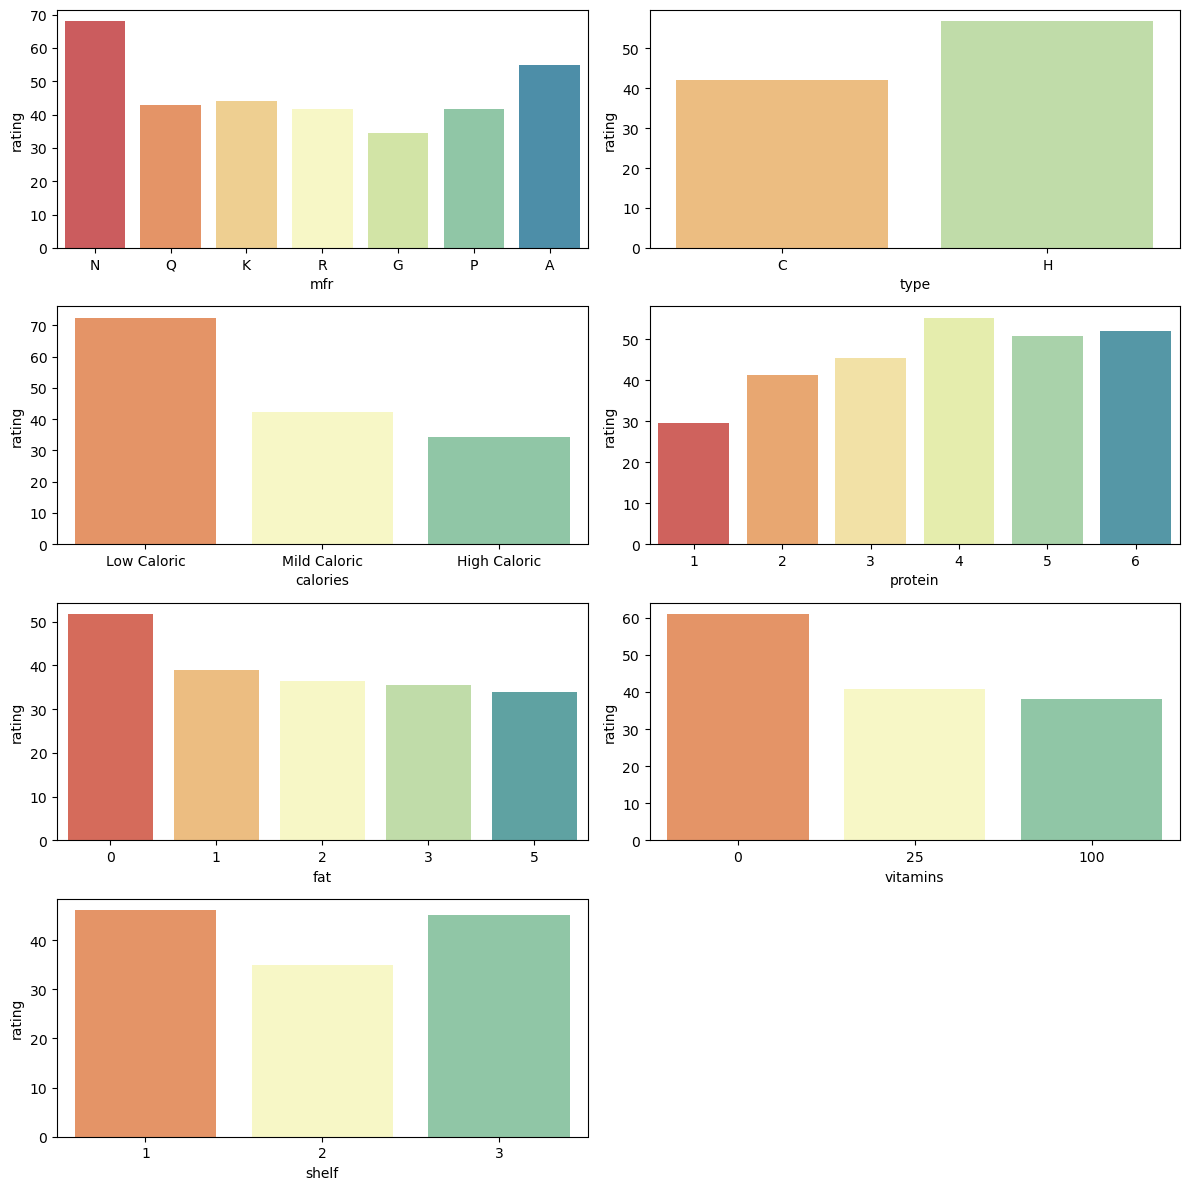

In [27]:
q = 1
plt.figure(figsize=(12,12))
for i in cat_cols:
    plt.subplot(4,2,q)
    sns.barplot(data=data, x = i, y = 'rating', estimator=np.mean, palette='Spectral', ci = None)
    q+=1

plt.tight_layout()
plt.show()

Inferences :

- H type Cereals have higher Ratings than C type

- Low Caloric Cereals have higher Ratings

- Low Fat Content Cereals Have Higher Ratings

- High Protein COntent Cereals have higher Ratings 

- Shelf Life does not show any specific trend as 1 category and 3 category have higher ratings than that of others

## **Duplicate Value Treatment**

In [28]:
data.duplicated().sum()

0

- No Duplicate In The Data.

## **Null Value Treatment**

In [29]:
data.isnull().sum().sum()

0

- No Null Values in the Data

## **Outlier Detection**

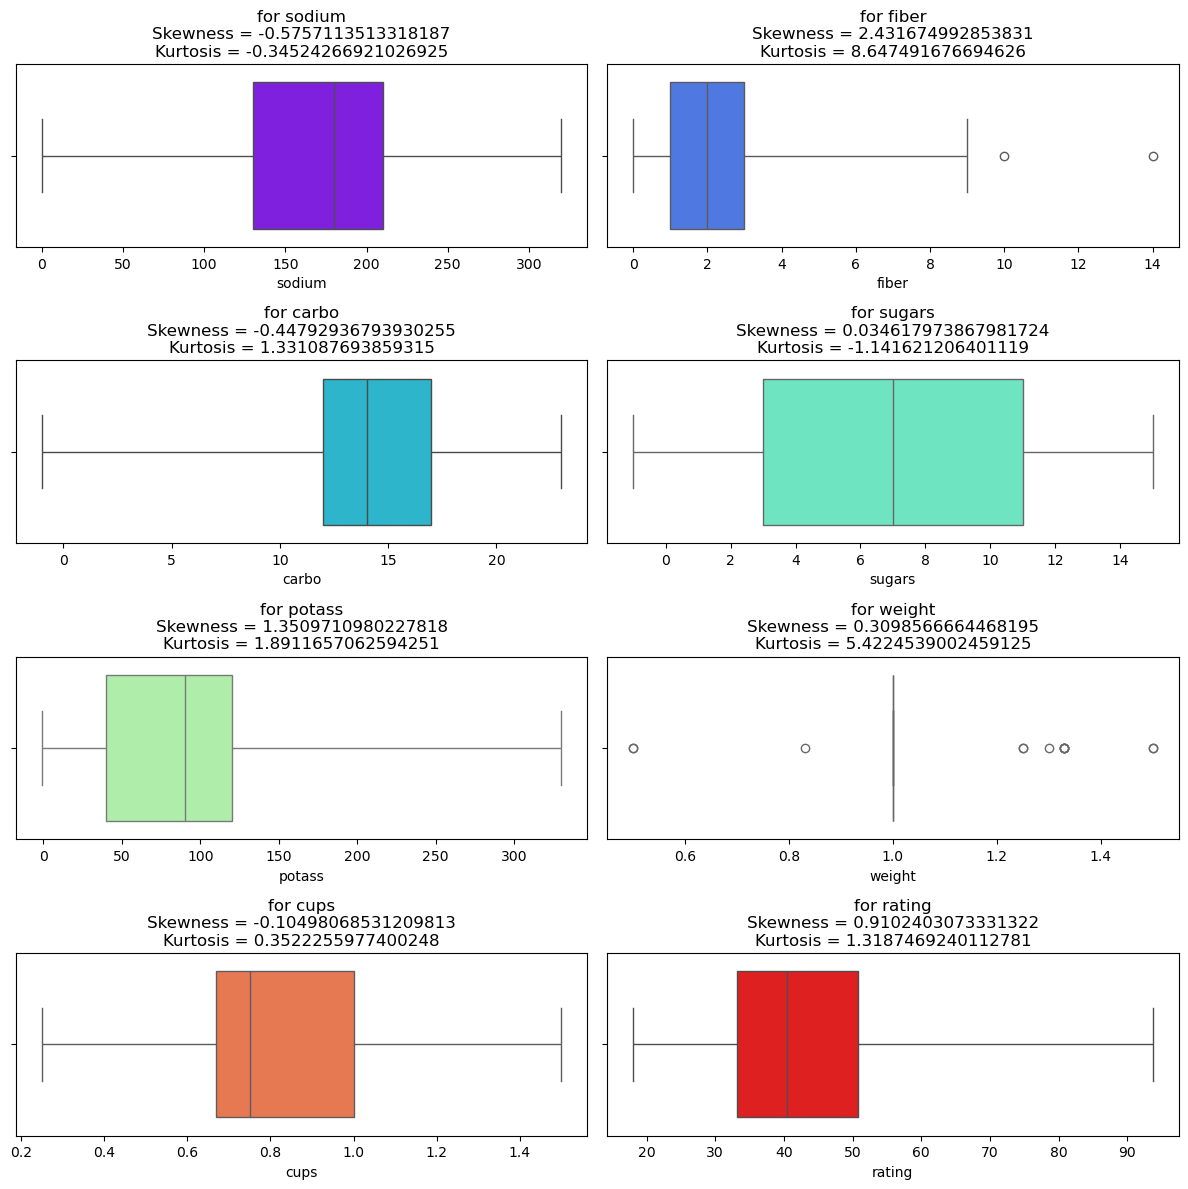

In [30]:
q = 1
plt.figure(figsize=(12,12))
colors = plt.cm.rainbow(np.linspace(0,1, len(num_cols)))
for i,color in zip(num_cols,colors):
    plt.subplot(4,2,q)
    sns.boxplot(data=data, x = i, fill=True, color = color, whis=3)
    plt.title(f'''for {i}
Skewness = {data[i].skew()}
Kurtosis = {data[i].kurt()}''')
    q+=1
plt.tight_layout()
plt.show()

Inferences :

- We Have taken whis Length as 3 as we want to consider data from 3 Standard Deviation.

- Still We can see Outlier in weight Column But we will Keep it as it is.

## **Statistical Inferences**

In [31]:
from scipy import stats

### **T-Test On Numerical Columns**

In [32]:
Ho = 'There is no significant relation between rating and sodium columns'
Ha = 'There is significant relation between rating and sodium columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['sodium'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 4.7775746938230636e-18
We reject the Null Hypo
So,
There is significant relation between rating and sodium columns


In [33]:
Ho = 'There is no significant relation between rating and fiber columns'
Ha = 'There is significant relation between rating and fiber columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['fiber'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 1.5430690459261013e-41
We reject the Null Hypo
So,
There is significant relation between rating and fiber columns


In [34]:
Ho = 'There is no significant relation between rating and carbo columns'
Ha = 'There is significant relation between rating and carbo columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['carbo'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 1.2025402873785255e-27
We reject the Null Hypo
So,
There is significant relation between rating and carbo columns


In [35]:
Ho = 'There is no significant relation between rating and sugars columns'
Ha = 'There is significant relation between rating and sugars columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['sugars'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 9.093971338116398e-29
We reject the Null Hypo
So,
There is significant relation between rating and sugars columns


In [36]:
Ho = 'There is no significant relation between rating and potass columns'
Ha = 'There is significant relation between rating and potass columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['potass'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 9.86810086140924e-10
We reject the Null Hypo
So,
There is significant relation between rating and potass columns


In [37]:
Ho = 'There is no significant relation between rating and weight columns'
Ha = 'There is significant relation between rating and weight columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['weight'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 1.7509968618818116e-39
We reject the Null Hypo
So,
There is significant relation between rating and weight columns


In [38]:
Ho = 'There is no significant relation between rating and cups columns'
Ha = 'There is significant relation between rating and cups columns'


test_stat, pval = stats.ttest_rel(data['rating'], data['cups'])

print(f'P Value = {pval}')

if pval >= 0.5:
    print('We fail to reject the Null Hypo')
    print('So,')
    print(Ho)

else:
    print('We reject the Null Hypo')
    print('So,')
    print(Ha)


P Value = 1.2655027481383566e-39
We reject the Null Hypo
So,
There is significant relation between rating and cups columns


### **Anova Test (aka F-Test) on Categorical Columns**

In [39]:
for i in cat_cols:
    Ho = f'There is no significant relation between rating and {i} columns'
    Ha = f'There is significant relation between rating and {i} columns'

    magics = [data['rating'][data[i] == j] for j in data[i].unique()]


    test_stat, pval = stats.f_oneway(*magics)

    print(f'P Value = {pval}')

    if pval >= 0.5:
        print('We fail to reject the Null Hypo')
        print('So,')
        print(Ho)

    else:
        print('We reject the Null Hypo')
        print('So,')
        print(Ha)


P Value = 1.0324175306855554e-05
We reject the Null Hypo
So,
There is significant relation between rating and mfr columns
P Value = 0.07658077338734878
We reject the Null Hypo
So,
There is significant relation between rating and type columns
P Value = 0.000127041297492347
We reject the Null Hypo
So,
There is significant relation between rating and calories columns
P Value = 0.00037751442319404477
We reject the Null Hypo
So,
There is significant relation between rating and protein columns
P Value = 0.0005639292709355855
We reject the Null Hypo
So,
There is significant relation between rating and fat columns
P Value = 0.00021178837994645196
We reject the Null Hypo
So,
There is significant relation between rating and vitamins columns
P Value = 0.011033084421238076
We reject the Null Hypo
So,
There is significant relation between rating and shelf columns


Inferences :

- All Columns are Significant So we Consider All of them.

## **Feature Encoding**

Inferences :

- We Have 3 Columns Which need Encodig Treatment.

- We Will Use LabelEncoder for that.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lb = LabelEncoder()

data['mfr'] = lb.fit_transform(data[['mfr']])

data['type'] = lb.fit_transform(data[['type']])

data['calories'] = lb.fit_transform(data[['calories']])

In [42]:
data.head(3)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,3,0,2,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,5,0,2,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,2,0,2,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


# **----NOW THIS DATA IS READY FOR MACHINE LEARNING MODELS----**